# Bibliotecas python

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Carregar a base de dados do arquivo CSV

In [137]:
url = "https://github.com/valdineyatilio/ProjetoAplicado-II/raw/refs/heads/main/Aula-02/BaseDeDadosYouTube.csv"

In [139]:
dados_youtube = pd.read_csv(url, encoding='latin1')

# Vizualição das primeiras linhas do data frame

In [142]:
print(dados_youtube.head())

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US  

# Verificar os nomes das colunas

In [145]:
print(dados_youtube.columns)

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')


# Verificação de Tipos de Dados

In [148]:
for coluna in dados_youtube.columns:
    if dados_youtube[coluna].dtype == 'object':
        dados_youtube[coluna] = dados_youtube[coluna].astype('category')
    elif dados_youtube[coluna].dtype in ['int64', 'float64']:
        dados_youtube[coluna] = dados_youtube[coluna].astype(float)

# Verificação das informações das colunas

In [151]:
print(dados_youtube.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   rank                                     995 non-null    float64 
 1   Youtuber                                 995 non-null    category
 2   subscribers                              995 non-null    float64 
 3   video views                              995 non-null    float64 
 4   category                                 949 non-null    category
 5   Title                                    995 non-null    category
 6   uploads                                  995 non-null    float64 
 7   Country                                  873 non-null    category
 8   Abbreviation                             873 non-null    category
 9   channel_type                             965 non-null    category
 10  video_views_rank                      

# Resumo estatístico das variáveis numéricas

In [154]:
print(dados_youtube.describe())

            rank   subscribers   video views        uploads  video_views_rank  \
count  995.00000  9.950000e+02  9.950000e+02     995.000000      9.940000e+02   
mean   498.00000  2.298241e+07  1.103954e+10    9187.125628      5.542489e+05   
std    287.37606  1.752611e+07  1.411084e+10   34151.352254      1.362782e+06   
min      1.00000  1.230000e+07  0.000000e+00       0.000000      1.000000e+00   
25%    249.50000  1.450000e+07  4.288145e+09     194.500000      3.230000e+02   
50%    498.00000  1.770000e+07  7.760820e+09     729.000000      9.155000e+02   
75%    746.50000  2.460000e+07  1.355470e+10    2667.500000      3.584500e+03   
max    995.00000  2.450000e+08  2.280000e+11  301308.000000      4.057944e+06   

       country_rank  channel_type_rank  video_views_for_the_last_30_days  \
count    879.000000         962.000000                      9.390000e+02   
mean     386.053470         745.719335                      1.756103e+08   
std     1232.244746        1944.386561    

# Visualizações gráficas 

<Figure size 1400x600 with 0 Axes>

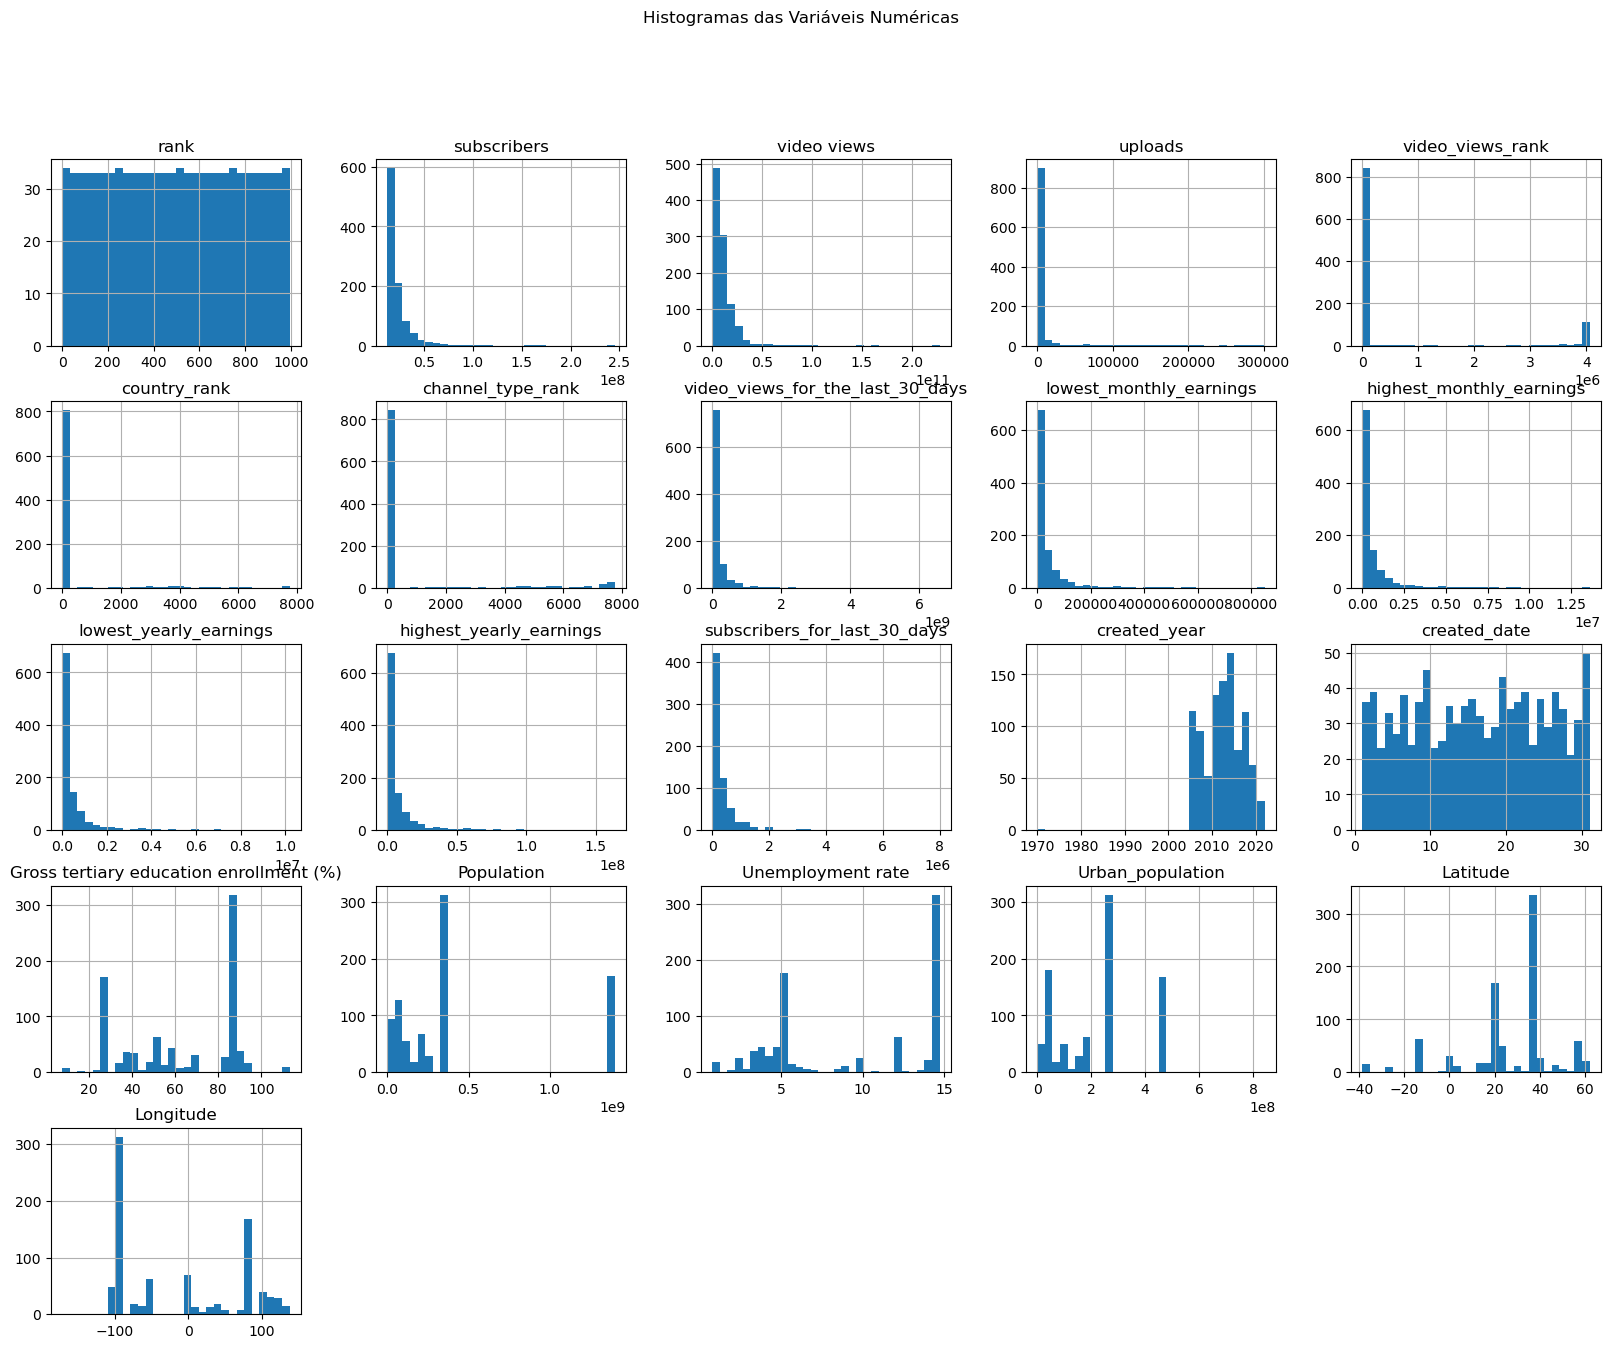

In [160]:
plt.figure(figsize=(14, 6))
dados_youtube.hist(bins=30, figsize=(20,15))
plt.suptitle('Histogramas das Variáveis Numéricas')
plt.show()

# Histograma das visualizações

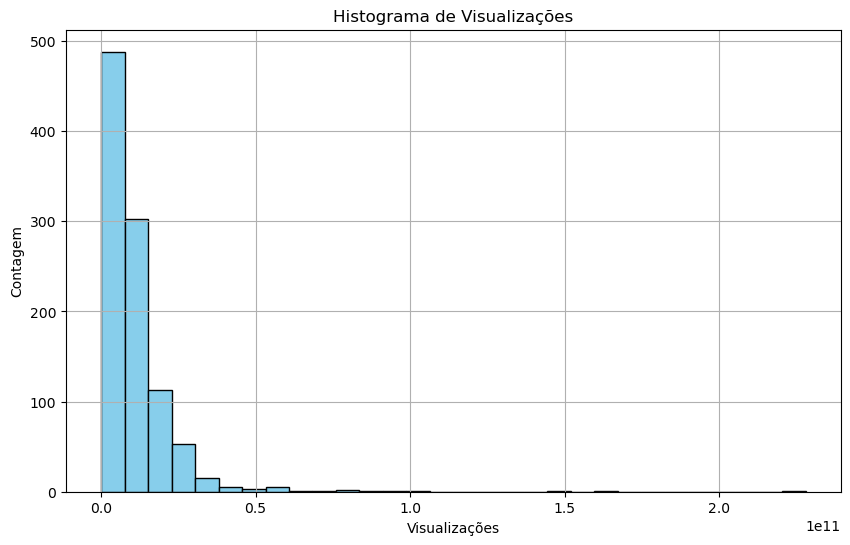

In [106]:
plt.figure(figsize=(10, 6))
plt.hist(dados_youtube['video views'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Visualizações')
plt.xlabel('Visualizações')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

# Gráfico de dispersão de visualização vs. país

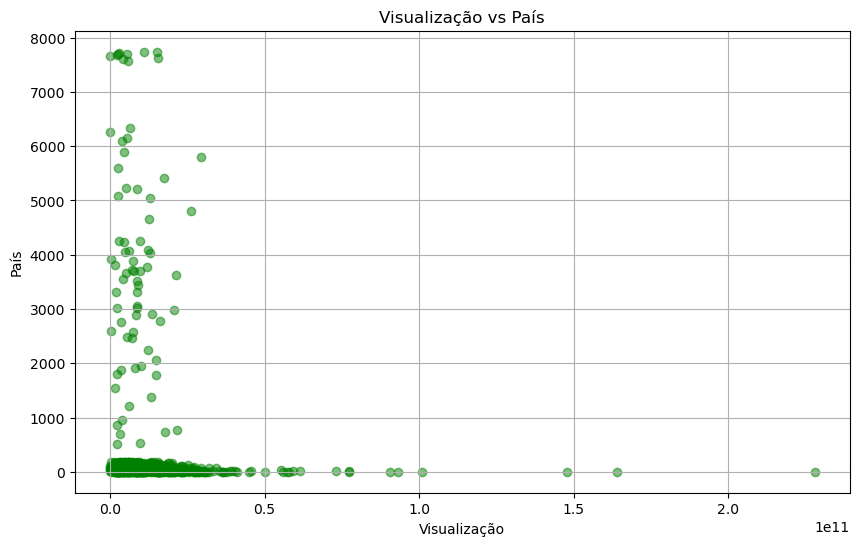

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(dados_youtube['video views'], dados_youtube['country_rank'], alpha=0.5, color='green')
plt.title('Visualização vs País')
plt.xlabel('Visualização')
plt.ylabel('País')
plt.grid(True)
plt.show()

# Gráfico de barras do número de vídeos por categoria

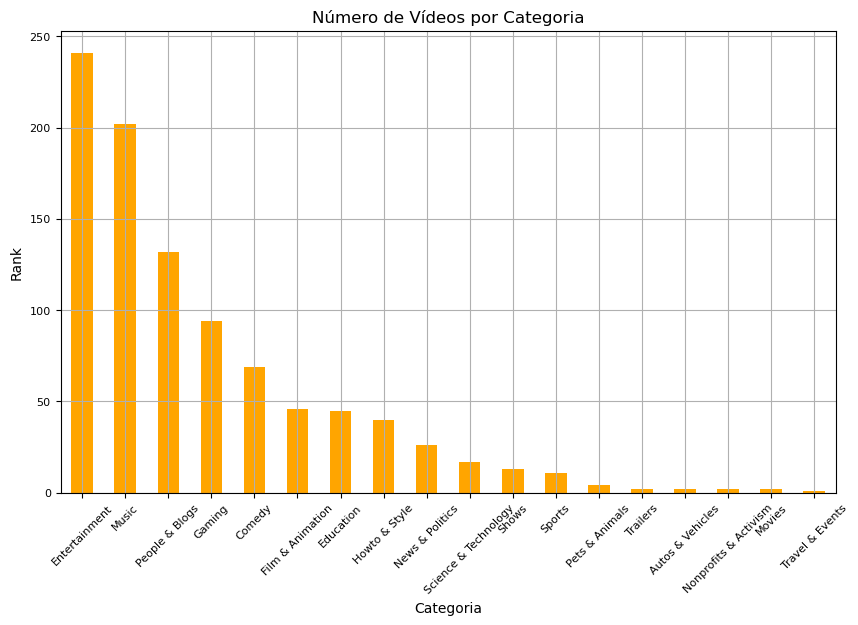

In [110]:
plt.figure(figsize=(10, 6))
dados_youtube['category'].value_counts().plot(kind='bar', color='orange', fontsize=8)
plt.title('Número de Vídeos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Rank')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Identificação de valores ausentes

In [115]:
print("\nValores Ausentes:")
print(dados_youtube.isnull().sum())


Valores Ausentes:
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                            

# Identificação de outliers usando Z-score

In [119]:
from scipy import stats
z_scores = np.abs(stats.zscore(dados_youtube.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=1)
print("\nNúmero de outliers em cada linha:")
print(outliers)


Número de outliers em cada linha:
0      6
1      1
2      5
3      6
4      7
      ..
990    0
991    0
992    0
993    0
994    0
Length: 995, dtype: int64


# Boxplot para identificar outliers

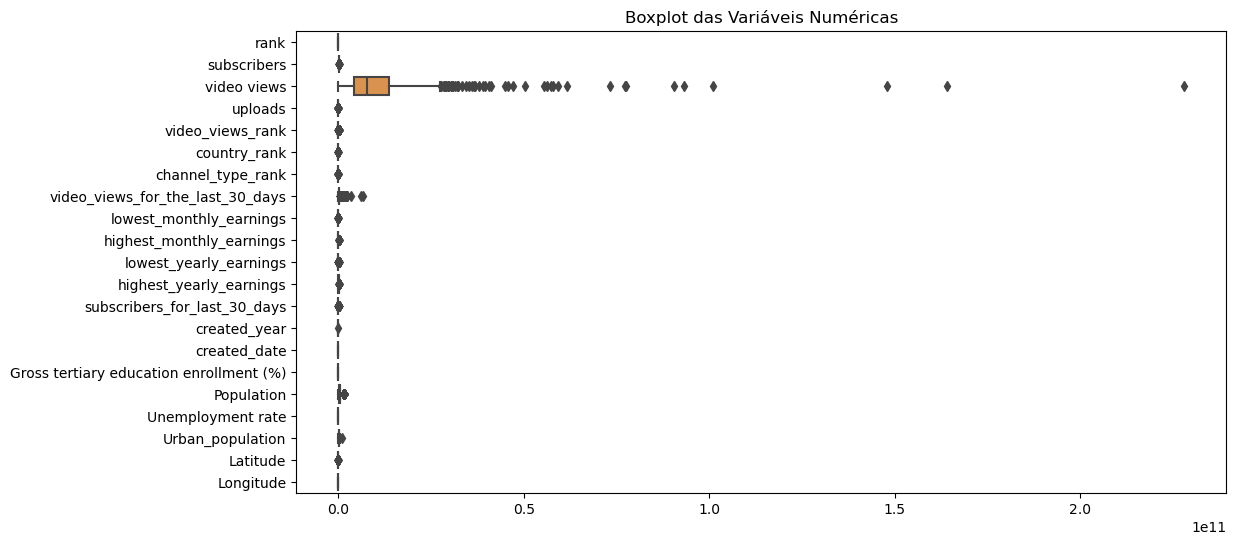

In [122]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dados_youtube.select_dtypes(include=[float]), orient='h')
plt.title('Boxplot das Variáveis Numéricas')
plt.show()

# Removendo outliers

In [125]:
df_clean = dados_youtube[(z_scores < 3).all(axis=1)]
print("\nDataFrame após remoção de outliers:")
print(df_clean.describe())


DataFrame após remoção de outliers:
       rank  subscribers  video views  uploads  video_views_rank  \
count   0.0          0.0          0.0      0.0               0.0   
mean    NaN          NaN          NaN      NaN               NaN   
std     NaN          NaN          NaN      NaN               NaN   
min     NaN          NaN          NaN      NaN               NaN   
25%     NaN          NaN          NaN      NaN               NaN   
50%     NaN          NaN          NaN      NaN               NaN   
75%     NaN          NaN          NaN      NaN               NaN   
max     NaN          NaN          NaN      NaN               NaN   

       country_rank  channel_type_rank  video_views_for_the_last_30_days  \
count           0.0                0.0                               0.0   
mean            NaN                NaN                               NaN   
std             NaN                NaN                               NaN   
min             NaN                NaN        

# Análise de Correlação

In [128]:
# Selecionando colunas numericas  e calculando a correlação
numeric_data = dados_youtube.select_dtypes(include=[float, int])
correlacao = numeric_data.corr()


# Mapa de calor da correlação

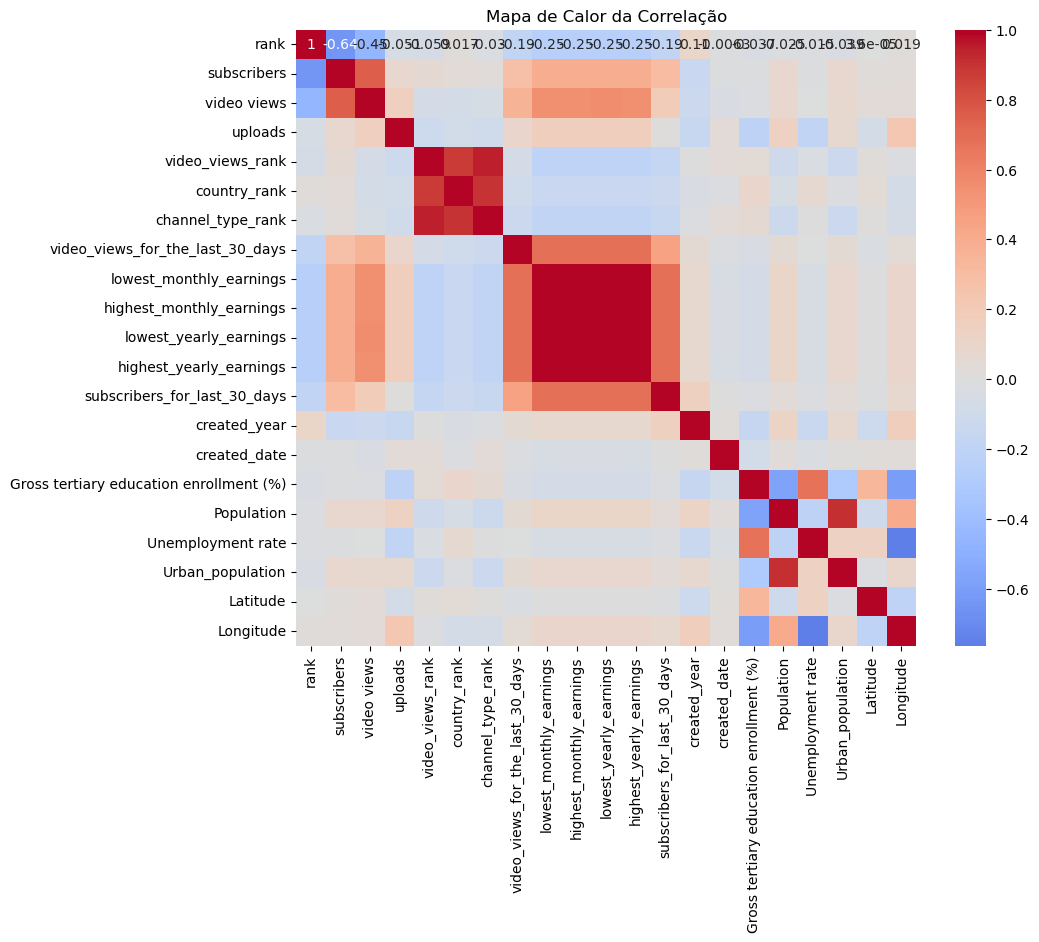

In [131]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor da Correlação')
plt.show()